## 2018년 범죄별 데이터 시각화

In [1]:
# 한글 폰트 설정
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [2]:
import pandas as pd
import numpy as np

# http://kosis.kr/statHtml/statHtml.do?orgId=132&tblId=DT_13204_2011_211&conn_path=I2
# csv 파일을 불러옴
df = pd.read_csv('crime.csv')
# 두번째 행을 열의 이름으로 설정
df = df.rename(columns=df.iloc[0])[1:]

In [3]:
# 데이터 프레임 출력 (상위 5행)
df.head()

,죄종별(1),죄종별(2),죄종별(3),발생건수 (건),검거건수 (건),검거율 (%),검거인원 (명),남자검거인원 (명),여자검거인원 (명),불상검거인원 (명),법인체 (개)
1,총계,소계,소계,1580751,1328609,84,1728602,1286156,329007,113439,12302
2,강력범죄,소계,소계,26787,25811,96.4,28859,27339,1196,324,-
3,강력범죄,살인기수,소계,309,298,96.4,358,289,67,2,-
4,강력범죄,살인기수,살인,226,217,96,269,218,49,2,-
5,강력범죄,살인기수,영아살해,7,7,100,6,-,6,-,-


In [4]:
# 죄종별(1)에 나오는 모든 범죄이름 저장
crime_names = df['죄종별(1)'].drop_duplicates().values[1:]
crime_names

array(['강력범죄', '절도범죄', '폭력범죄', '지능범죄', '풍속범죄', '특별경제범죄', '마약범죄', '보건범죄',
       '환경범죄', '교통범죄', '노동범죄', '안보범죄', '선거범죄', '병역범죄', '기타범죄'],
      dtype=object)

In [5]:
crimes = []
# 각각의 범죄명에 따라 
for crime_name in crime_names:
    # 죄종별(1) 열의 범죄명이 현재 for문의 범죄명이고, 죄종별(2)의 값이 소계인것을 crime으로 저장
    crime = df[(df['죄종별(1)'] == crime_name) & (df['죄종별(2)'] == '소계')]
    # 각 dataframe에 있는 값을 숫자로 변환 (문자열 숫자를 정수형, 실수형으로 변환)
    # 4번째 열부터 숫자변환을 적용함
    crime = crime.apply(pd.to_numeric, errors='coerce').fillna(0).iloc[:, 3:]
    index_num = crime.index[0]
    # crime 데이터 프레임의 index를 범죄명으로 변경
    crime = crime.rename(index={index_num:crime_name})
    crimes.append(crime)

# 각각의 범죄명에 대한 데이터프레임을 모두 합쳐서 하나의 데이터프레임으로 가공
result = pd.concat(crimes, ignore_index=False)
# 발생건수가 5만 이상인것과 5만 미만인것으로 구분
result_big = result[result['발생건수 (건)'] >= 50000]
result_small = result[result['발생건수 (건)'] < 50000]

# 발생건수가 5만 이상인 범죄명과 5만 미만인 범죄명
crime_big_names = result_big.index
crime_small_names = result_small.index

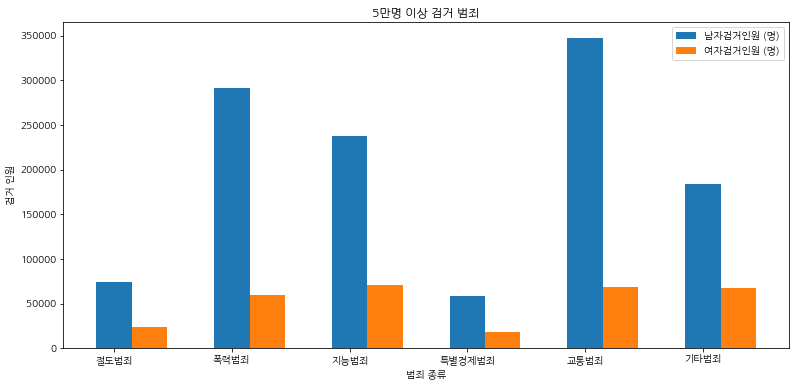

In [6]:
# plot figure 사이즈 : 1300 * 600 해상도
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1,1,1)

# x축 설정 : 5만 이상 범죄명 개수만큼 설정
x = np.arange(len(crime_big_names))

# 첫번째 막대그래프 : 남자
p1 = plt.bar(x, result_big['남자검거인원 (명)'].values,  width=0.3, label='남자검거인원 (명)')

# 두번째 막대그래프 : 여자
p2 = plt.bar(x + 0.3, result_big['여자검거인원 (명)'].values, width=0.3, label='여자검거인원 (명)')

# x축의 값을 범죄명으로 대치
plt.xticks(x, crime_big_names)

# 범례 표시
plt.legend()

# x축, y축, 전체 plot title 설정
plt.xlabel('범죄 종류')
plt.ylabel('검거 인원')
plt.title('5만명 이상 검거 범죄')

# plot 표시
plt.show()

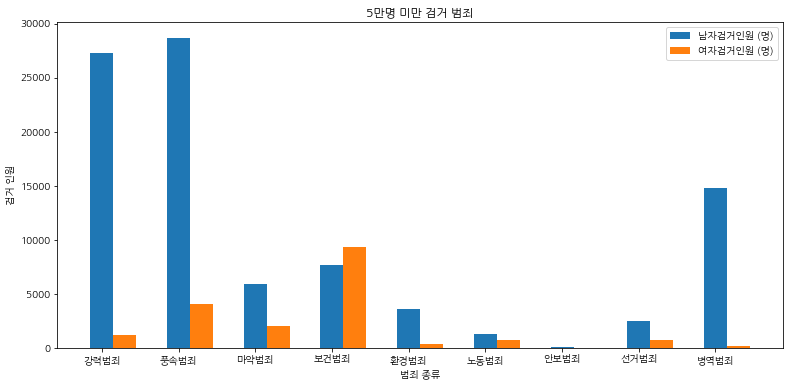

In [7]:
# plot figure 사이즈 : 1300 * 600 해상도
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1,1,1)

# x축 설정 : 5만 이상 범죄명 개수만큼 설정
x = np.arange(len(crime_small_names))

# 첫번째 막대그래프 : 남자
p1 = plt.bar(x, result_small['남자검거인원 (명)'].values, width=0.3, label='남자검거인원 (명)')

# 두번째 막대그래프 : 여자
p2 = plt.bar(x + 0.3, result_small['여자검거인원 (명)'].values, width=0.3, label='여자검거인원 (명)')

# x축의 값을 범죄명으로 대치
plt.xticks(x, crime_small_names)

# 범례 표시
plt.legend()

# x축, y축, 전체 plot title 설정
plt.xlabel('범죄 종류')
plt.ylabel('검거 인원')
plt.title('5만명 미만 검거 범죄')

# plot 표시
plt.show()

In [8]:
# 5만건 미만의 범죄는 모두 '소수범죄'로 묶음
temp = {}
for c in result.columns:
    temp[c] = result_small[c].sum()

# index를 소수범죄로 설정
result_others=pd.DataFrame(temp, index = ['소수범죄'])

result_sum = pd.concat([result_big, result_others],ignore_index=False)

# 소수범죄를 포함한 이름
crime_sum_names = result_sum.index
result_sum

,발생건수 (건),검거건수 (건),검거율 (%),검거인원 (명),남자검거인원 (명),여자검거인원 (명),불상검거인원 (명),법인체 (개)
절도범죄,176809,106669,60.3,100392,74348,24369,1675,8.0
폭력범죄,287611,251586,87.5,357264,291787,59445,6032,30.0
지능범죄,344698,245413,71.2,383560,238233,70997,74330,872.0
특별경제범죄,53994,46222,85.6,82135,58096,18643,5396,3391.0
교통범죄,408371,397277,97.3,423483,347858,68570,7055,869.0
기타범죄,221862,198903,89.7,268177,183675,68027,16475,5050.0
소수범죄,87406,82539,1017.6,113591,92159,18956,2476,2082.0


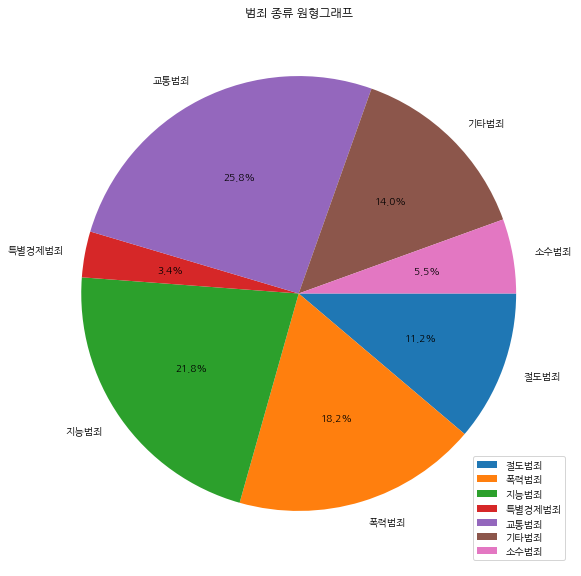

In [9]:
# plot figure 사이즈 : 1300 * 600 해상도
plt.figure(figsize=(10, 10))

# 원형그래프 : 발생건수
plt.pie(result_sum['발생건수 (건)'], labels = crime_sum_names, counterclock=False, autopct='%1.1f%%')

# 범례 표시
plt.legend()

# 제목설정
plt.title('범죄 종류 원형그래프')

# plot 표시
plt.show()

## 2013년 ~ 2018년 년도별 범죄 데이터 시각화

In [10]:
import pandas as pd
import numpy as np

# http://kosis.kr/statHtml/statHtml.do?orgId=132&tblId=DT_13204_2011_211&conn_path=I2
# csv 파일을 불러옴
df = pd.read_csv('crime_year.csv')
# 두번째 행을 열의 이름으로 설정
df.head()

,죄종별,항목,단위,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년
0,총계,발생건수,건,1857276.0,1778966,1861657.0,1849450,1662341,1580751
1,총계,검거건수,건,1420658.0,1392112,1500234.0,1552455,1413717,1328609
2,총계,검거율,%,76.5,78.3,80.6,83.9,85,84
3,총계,검거인원,명,1962718.0,1930325,1999065.0,2029873,1833495,1728602
4,총계,남자검거인원,명,1503465.0,1462970,1487695.0,1542900,1387401,1286156


In [11]:
# 발생건수, 검거건수, 검거율 저장할 임시 list
crimes_3col = []

# 5만 이상 범죄명에 따라 
for crime_name in crime_big_names:
    # 죄종별로 발생건수 데이터 프레임 생성
    crime_occur = df[(df['죄종별'] == crime_name) & (df['항목'] == '발생건수')]
    # 각 dataframe에 있는 값을 숫자로 변환 (문자열 숫자를 정수형, 실수형으로 변환)
    crime_occur = crime_occur.apply(pd.to_numeric, errors='coerce').fillna(0).iloc[:, 3:]
    # crime 데이터 프레임의 index를 범죄명으로 변경
    index_num = crime_occur.index[0]
    crime_occur = crime_occur.rename(index={index_num:crime_name + '_발생건수'})
    
    crimes_3col.append(crime_occur)
    
    # 죄종별로 발생건수 데이터 프레임 생성
    crime_arrest = df[(df['죄종별'] == crime_name) & (df['항목'] == '검거건수')]
    # 각 dataframe에 있는 값을 숫자로 변환 (문자열 숫자를 정수형, 실수형으로 변환)
    crime_arrest = crime_arrest.apply(pd.to_numeric, errors='coerce').fillna(0).iloc[:, 3:]
    # crime 데이터 프레임의 index를 범죄명으로 변경
    index_num = crime_arrest.index[0]
    crime_arrest = crime_arrest.rename(index={index_num:crime_name + '_검거건수'})
    
    crimes_3col.append(crime_arrest)
    
    # 죄종별로 발생건수 데이터 프레임 생성
    crime_ratio = df[(df['죄종별'] == crime_name) & (df['항목'] == '검거율')]
    # 각 dataframe에 있는 값을 숫자로 변환 (문자열 숫자를 정수형, 실수형으로 변환)
    crime_ratio = crime_ratio.apply(pd.to_numeric, errors='coerce').fillna(0).iloc[:, 3:]
    # crime 데이터 프레임의 index를 범죄명으로 변경
    index_num = crime_ratio.index[0] 
    crime_ratio = crime_ratio.rename(index={index_num:crime_name + '_검거율'})
    
    crimes_3col.append(crime_ratio)
    
# 데이터 프레임을 만듬
result = pd.concat(crimes_3col, ignore_index=False)
result

,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년
절도범죄_발생건수,288343.0,266222.0,245853.0,203037.0,183757.0,176809.0
절도범죄_검거건수,118578.0,119467.0,127368.0,118597.0,113771.0,106669.0
절도범죄_검거율,41.1,44.9,51.8,58.4,61.9,60.3
폭력범죄_발생건수,294188.0,290079.0,305947.0,309394.0,293086.0,287611.0
폭력범죄_검거건수,243438.0,242798.0,262401.0,271048.0,257623.0,251586.0
폭력범죄_검거율,82.7,83.7,85.8,87.6,87.9,87.5
지능범죄_발생건수,329439.0,298652.0,316121.0,312577.0,302466.0,344698.0
지능범죄_검거건수,207108.0,204116.0,236499.0,240226.0,225445.0,245413.0
지능범죄_검거율,62.9,68.3,74.8,76.9,74.5,71.2
특별경제범죄_발생건수,71019.0,72908.0,86329.0,65025.0,53356.0,53994.0


In [12]:
# 데이터 프레임의 열을 리스트로 저장
cols = result.columns.tolist()
cols

['2013 년', '2014 년', '2015 년', '2016 년', '2017 년', '2018 년']

In [13]:
# 각 범죄별 plot 그리는 함수
def plot_print(idx):

    # plot figure 사이즈 : 1300 * 600 해상도
    fig = plt.figure(figsize=(13,6))
    plot_num = len(crime_big_names)
    ax = fig.subplots(nrows=1, ncols=2, sharex=True, sharey=False)

    x = np.arange(len(cols))
    
    ax[0].bar(x-0.1, result.loc[crime_big_names[idx] + '_발생건수'], width = 0.2, label='발생건수')
    ax[0].bar(x+0.1, result.loc[crime_big_names[idx] + '_검거건수'], color='orange', width = 0.2, label='검거건수')
    ax[1].plot(x, result.loc[crime_big_names[idx] + '_검거율'], color='green')

    # x축의 값을 범죄명으로 대치
    ax[0].set_xticklabels([''] + cols)


    # x축, y축, 전체 plot title 설정
    ax[0].set_ylabel('건수')
    ax[1].set_ylabel('백분율')
    
    # y축 범위 설정
    ax[1].set_ylim(0, 100)
    
    # 각 plot 제목 설정
    ax[0].set_title(crime_big_names[idx] + '_발생건수')
    ax[1].set_title(crime_big_names[idx] + '_검거율')
    
    ax[0].legend()

    # plot 표시
    plt.show()

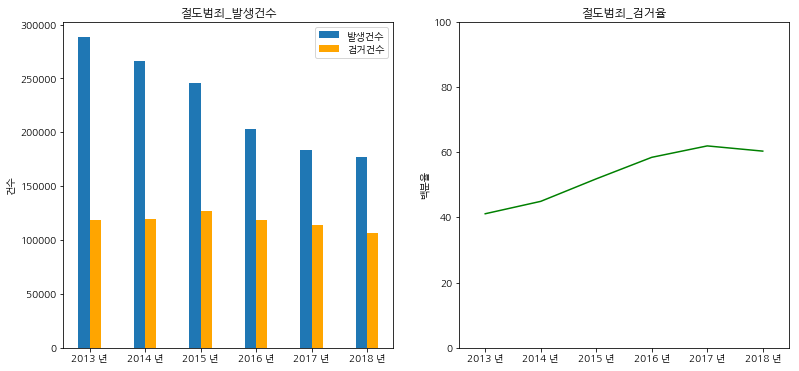

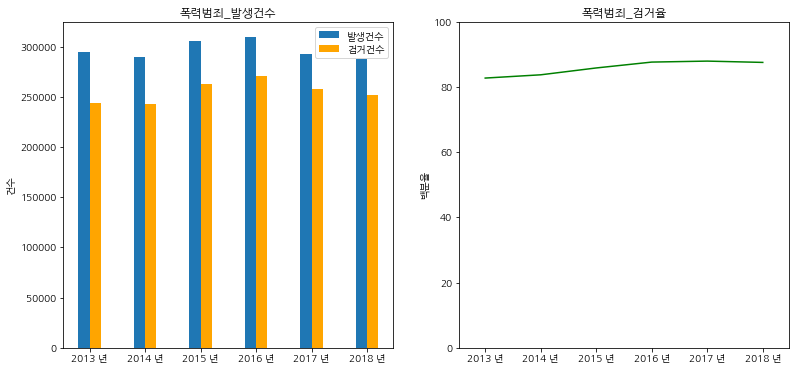

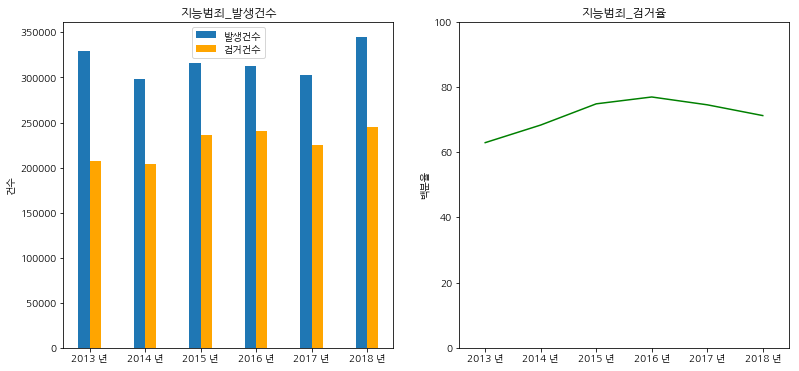

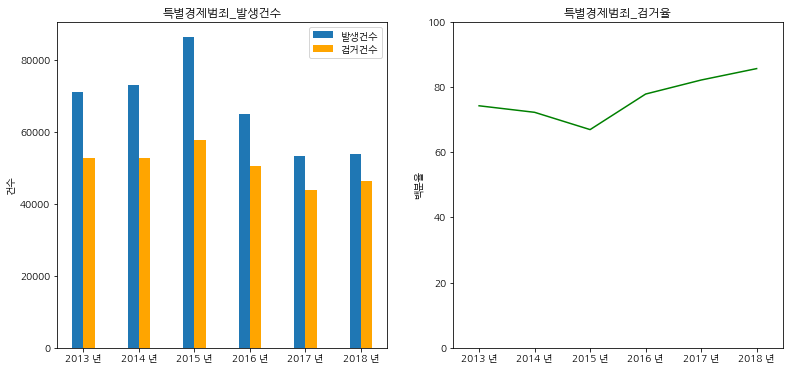

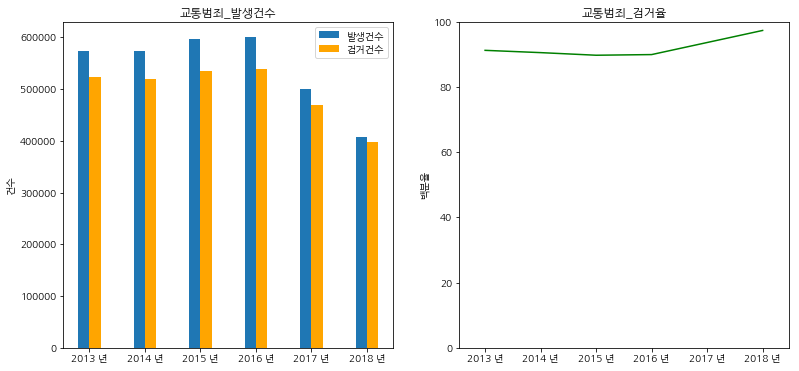

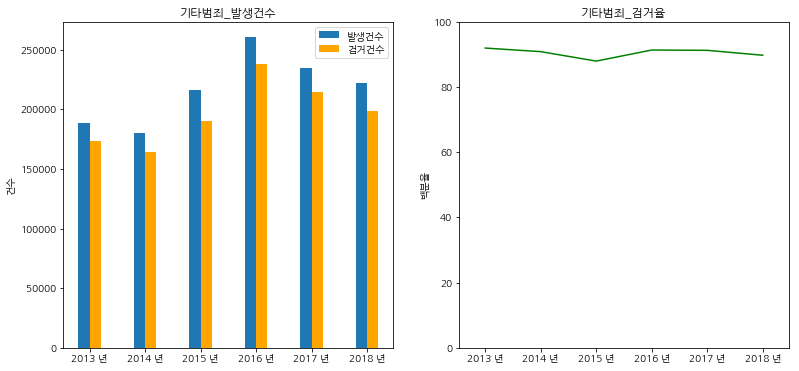

In [14]:
for i in range(len(crime_big_names)):
    plot_print(i)


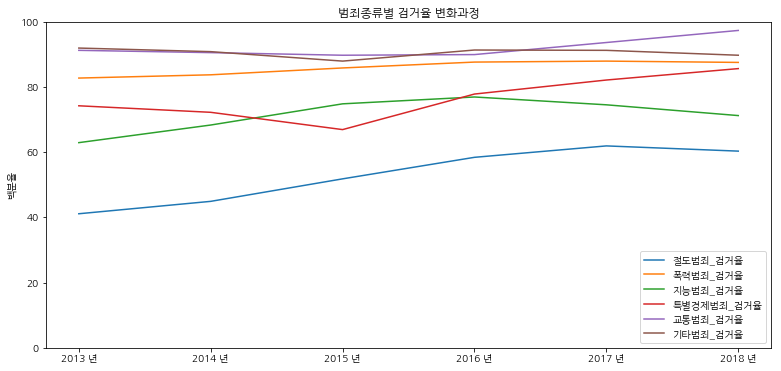

In [15]:
# plot figure 사이즈 : 1300 * 600 해상도
fig = plt.figure(figsize=(13,6))
ax1 = fig.add_subplot(1,1,1)
x = np.arange(len(cols))

# 모든 범죄를 plot
for crime_big_name in crime_big_names:
    ax1.plot(x, result.loc[crime_big_name + '_검거율'])

# 범례 위치를 지정해서 표시
plt.legend(loc='lower right')

# x축, y축, 전체 plot title 설정
ax1.set_ylabel('백분율')
ax1.set_xticklabels([''] + cols)
plt.title('범죄종류별 검거율 변화과정')

# y축 범위 설정
ax1.set_ylim(0, 100)

# plot 표시
plt.show()

In [16]:
result_crime_final = result

## 1925년 이후 5년간 한반도 인구변화 

In [17]:
# http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1IN0001_ENG&conn_path=I2
# csv 파일을 불러옴
df = pd.read_csv('population.csv')

df.head()

,행정구역별,연령별,항목,단위,1925 년,1930 년,1935 년,1940 년,1944 년,1949 년,...,1966 년,1970 년,1975 년,1980 년,1985 년,1990 년,1995 년,2000 년,2005 년,2010 년
0,전국,계,인구,명,19020030.00,20438108.00,22208102.00,23547465.00,25120174.00,20166756.0,...,29159640.00,31435252.00,34678972.00,37406815.00,40419652.00,43390374.0,44553710.00,45985289.00,47041434.00,47990761.0
1,전국,계,남자,명,9726150.00,10398889.00,11271005.00,11839295.00,12521173.00,10188238.0,...,14684147.00,15779615.00,17445246.00,18749306.00,20227564.00,21770919.0,22357352.00,23068181.00,23465650.00,23840896.0
2,전국,계,여자,명,9293880.00,10039219.00,10937097.00,11708170.00,12599001.00,9978518.0,...,14475493.00,15655637.00,17233726.00,18657509.00,20192088.00,21619455.0,22196358.00,22917108.00,23575784.00,24149865.0
3,전국,계,성비,NaN,104.65,103.58,103.05,101.12,99.38,102.1,...,101.44,100.79,101.23,100.49,100.18,100.7,100.73,100.66,99.53,98.7
4,전국,0 - 4세,인구,명,3069586.00,3281683.00,3671581.00,3897658.00,4278618.00,NaN,...,4480921.00,4316143.00,4227360.00,3794692.00,3702555.00,3279790.0,3427409.00,3130258.00,2382350.00,2219084.0


In [18]:
# 시군구별 이름 중에서 전국과 시만 저장
sector_names = []

# 모든 행정구역중에서 전국 및 OO시만 저장
for sector_name in df['행정구역별'].drop_duplicates().values:
    if sector_name == '전국' or sector_name[-1] == '시':
        sector_names.append(sector_name)
sector_names

['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시']

In [19]:
sectors = []
# 각각의 구역에 따라서 
for sector_name in sector_names:
    # 행정구역이 현재 for문의 구역이고, 인구수의 전체 합을 sector로 저장
    sector = df[(df['행정구역별'] == sector_name) & (df['연령별'] == '계') & (df['항목'] == '인구')]
    sectors.append(sector)

# 각각의 구역의 데이터 프레임을 전체 하나의 데이터 프레임으로 합함
result = pd.concat(sectors, ignore_index=False)
# 행의 index를 행정 구역 이름으로 설정
result = result.set_index('행정구역별')
result

,연령별,항목,단위,1925 년,1930 년,1935 년,1940 년,1944 년,1949 년,1955 년,...,1966 년,1970 년,1975 년,1980 년,1985 년,1990 년,1995 년,2000 년,2005 년,2010 년
행정구역별,,,,,,,,,,,,,,,,,,,,,
전국,계,인구,명,19020030.0,20438108.0,22208102.0,23547465.0,25120174.0,20166756.0,21502386.0,...,29159640.0,31435252.0,34678972.0,37406815.0,40419652.0,43390374.0,44553710.0,45985289.0,47041434.0,47990761.0
서울특별시,계,인구,명,NaN,NaN,NaN,NaN,NaN,1437670.0,1568746.0,...,3793280.0,5525262.0,6879464.0,8350616.0,9625755.0,10603250.0,10217177.0,9853972.0,9762546.0,9631482.0
부산광역시,계,인구,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1426019.0,1876391.0,2450125.0,3156931.0,3512113.0,3795892.0,3809618.0,3655437.0,3512547.0,3393191.0
대구광역시,계,인구,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2028370.0,2227979.0,2445288.0,2473990.0,2456016.0,2431774.0
인천광역시,계,인구,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1384916.0,1816328.0,2304176.0,2466338.0,2517680.0,2632035.0
광주광역시,계,인구,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1138717.0,1257063.0,1350948.0,1413644.0,1466143.0
대전광역시,계,인구,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1049122.0,1270873.0,1365961.0,1438551.0,1490158.0
울산광역시,계,인구,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012110.0,1044934.0,1071673.0


In [20]:
# 데이터 프레임에서 열 제목중 년도값만 추출
years = result.columns[3:]
temp = []

#5년 단위로 반올림
for year in years:
    y = round(int(year[:4]) * 2 , -1) // 2
    temp.append(str(y) + ' 년')
        
years = pd.Series(temp) 
years

0     1925 년
1     1930 년
2     1935 년
3     1940 년
4     1945 년
5     1950 년
6     1955 년
7     1960 년
8     1965 년
9     1970 년
10    1975 년
11    1980 년
12    1985 년
13    1990 년
14    1995 년
15    2000 년
16    2005 년
17    2010 년
dtype: object

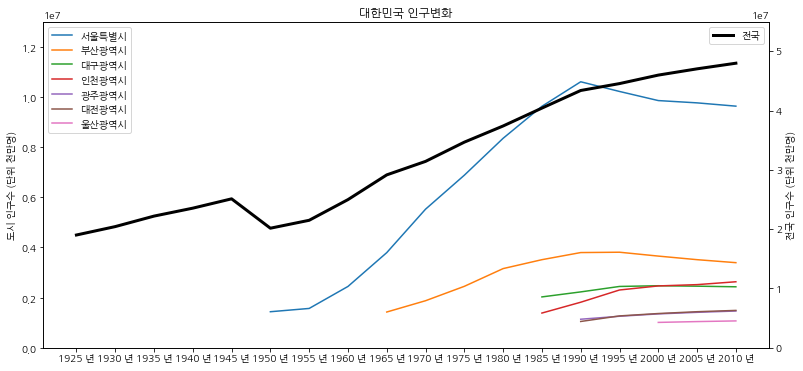

In [21]:
# plot figure 사이즈 : 1300 * 600 해상도
fig = plt.figure(figsize=(13,6))

# 두개의 y축 설정
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

# 전국을 제외한 각 시의 인구수 변화를 ax1 plot에 그림
for sector_name in sector_names[1:]:
    ax1.plot(years, result.loc[sector_name].apply(pd.to_numeric, errors='coerce')[3:], label=sector_name)

# 전국의 인구수 변화를 ax2 plot에 그림
ax2.plot(years, result.loc['전국'].apply(pd.to_numeric, errors='coerce')[3:], label='전국', color='black', linewidth=3)

# 범례 위치를 지정해서 표시
ax1.legend(loc='upper left')
plt.legend(loc='upper right')

# x축, y축, 전체 plot title 설정
plt.xlabel('년도 (5년단위)')
ax1.set_ylabel('도시 인구수 (단위 천만명)')
ax2.set_ylabel('전국 인구수 (단위 천만명)')

plt.title('대한민국 인구변화')

# y축 범위 설정
ax2.set_ylim(0, 55000000)
ax1.set_ylim(0, 13000000)

# plot 표시
plt.show()

## 2015년 이후 인구변화

In [22]:
# http://kosis.kr/statisticsList/statisticsListIndex.do?menuId=M_01_01&vwcd=MT_ZTITLE&parmTabId=M_01_01#SelectStatsBoxDiv
# csv 파일을 불러옴
df = pd.read_csv('population_2015.csv')

df.head()

,행정구역별(읍면동),항목,단위,2015 년,2016 년,2017 년,2018 년
0,전국,총인구,명,51069375,51269554,51422507,51629512
1,전국,남자,명,25608502,25696987,25768055,25877195
2,전국,여자,명,25460873,25572567,25654452,25752317
3,전국,내국인-계,명,49705663,49855796,49943260,49977951
4,전국,내국인-남자,명,24819839,24881520,24922392,24931554


In [23]:
sector_names

['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시']

In [24]:
sectors_df = []

# 각각의 범죄명에 따라 
for sector_name in sector_names:
    # 죄종별에 따라 발생건수, 검거건수, 검거비율을 저장.
    sector_df = df[(df['행정구역별(읍면동)'] == sector_name) & (df['항목'] == '총인구')]
    # 각 dataframe에 있는 값을 숫자로 변환 (문자열 숫자를 정수형, 실수형으로 변환)
    sector_df = sector_df.apply(pd.to_numeric, errors='coerce').fillna(0).iloc[:, 3:]
    # crime 데이터 프레임의 index를 범죄명으로 변경
    index_num = sector_df.index[0]
    sector_df = sector_df.rename(index={index_num:sector_name})
    
    sectors_df.append(sector_df)

# 데이터 프레임을 만듬
result = pd.concat(sectors_df, ignore_index=False)
result_population_final = result    
result_population_final

,2015 년,2016 년,2017 년,2018 년
전국,51069375,51269554,51422507,51629512
서울특별시,9904312,9805506,9741871,9673936
부산광역시,3448737,3440484,3416918,3395278
대구광역시,2466052,2461002,2453041,2444412
인천광역시,2890451,2913024,2925967,2936117
광주광역시,1502881,1501557,1496172,1490092
대전광역시,1538394,1535445,1525849,1511214
울산광역시,1166615,1166033,1157077,1150116


## 범죄데이터와 인구데이터를 결합한 데이터 시각화 : 2015년 ~ 2018년 인구 십만명 당 범죄자수

In [25]:
# 데이터 프레임의 열을 리스트로
cols = result_population_final.columns.tolist()
cols

['2015 년', '2016 년', '2017 년', '2018 년']

In [26]:
# 2014년 이하는 버림
result = result_crime_final[cols]
result

,2015 년,2016 년,2017 년,2018 년
절도범죄_발생건수,245853.0,203037.0,183757.0,176809.0
절도범죄_검거건수,127368.0,118597.0,113771.0,106669.0
절도범죄_검거율,51.8,58.4,61.9,60.3
폭력범죄_발생건수,305947.0,309394.0,293086.0,287611.0
폭력범죄_검거건수,262401.0,271048.0,257623.0,251586.0
폭력범죄_검거율,85.8,87.6,87.9,87.5
지능범죄_발생건수,316121.0,312577.0,302466.0,344698.0
지능범죄_검거건수,236499.0,240226.0,225445.0,245413.0
지능범죄_검거율,74.8,76.9,74.5,71.2
특별경제범죄_발생건수,86329.0,65025.0,53356.0,53994.0


In [27]:
# 발생건수를 인구수로 나누고 10만을 곱해서 10만명 당 범죄 발생건수 data frame 생성
temp = []
for crime_big_name in crime_big_names:
    tList = list(result.loc[crime_big_name+'_발생건수'] / result_population_final.loc['전국'] * 100000)
    tDict = {}
    for i in range(len(cols)):
        tDict[cols[i]] = [tList[i]]
    temp.append(pd.DataFrame(tDict, index=[crime_big_name]))

result_crimeratio_final = pd.concat(temp, ignore_index=False)
result_crimeratio_final

,2015 년,2016 년,2017 년,2018 년
절도범죄,481.409847,396.018659,357.347416,342.457236
폭력범죄,599.081152,603.465363,569.956653,557.067051
지능범죄,619.003072,609.673726,588.197693,667.637533
특별경제범죄,169.042601,126.829658,103.760013,104.579722
교통범죄,1168.342084,1171.067336,974.596591,790.964284
기타범죄,423.339820,508.174891,456.747471,429.719343


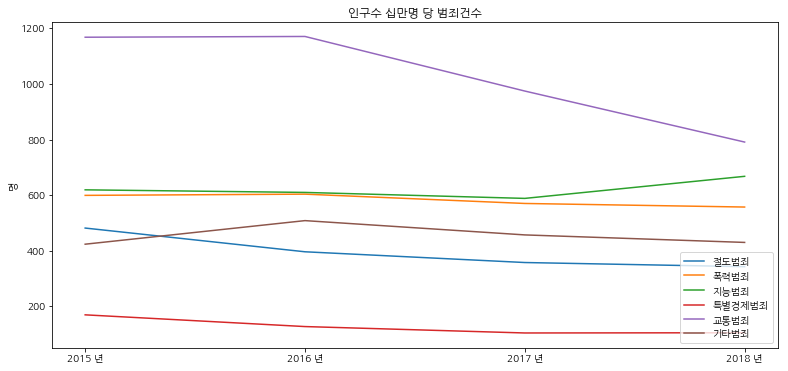

In [28]:
# plot figure 사이즈 : 1300 * 600 해상도
fig = plt.figure(figsize=(13,6))

ax1 = fig.add_subplot(1,1,1)
x = np.arange(len(cols))

# 범죄 종류 별 10만명 당 범죄자 수 그리기
for crime_big_name in crime_big_names:
    ax1.plot(result_crimeratio_final.loc[crime_big_name])

# 범례 위치를 지정해서 표시
plt.legend(loc='lower right')

# x축, y축, 전체 plot title 설정
ax1.set_ylabel('명')
ax1.set_xticklabels(cols)
plt.title('인구수 십만명 당 범죄건수')

# plot 표시
plt.show()